In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\sheli\\Desktop\\Data Analyst Project resume\\Diwali Sales Data.csv",encoding='unicode_escape') #reading the csv file

In [3]:
df.shape #no of rows and columns present in the dataframe

(11251, 15)

In [4]:
df.columns #column names

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [5]:
df.info() #information about the dataframe(non-null count/rows/columns/dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum() #null values present in each column

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [7]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)  #dropping columns having null values

In [8]:
df.isnull().sum() #re checking if the column got dropped

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df['Amount'].fillna(method='ffill',inplace=True) #inserting data to the Amount column having null value using front fill method

In [10]:
df['Amount'].isnull().sum()

0

In [11]:
df.duplicated().sum() #checking if duplicate row exist

8

In [12]:
df.drop_duplicates(inplace=True) #Removing Duplicate row 

In [13]:
df.duplicated().sum() #rechecking if duplicate datas are removed

0

In [14]:
df['Amount'].dtypes #checking data types of Amount column

dtype('float64')

In [15]:
print (df.dtypes) #checking the data type of other column

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object


In [16]:
df['Amount']=df['Amount'].astype('int') #converting data type from float to integer

In [17]:
df['Amount'].dtypes

dtype('int32')

# Exploratory Data Analysis

# Top 5 States contributing to sales

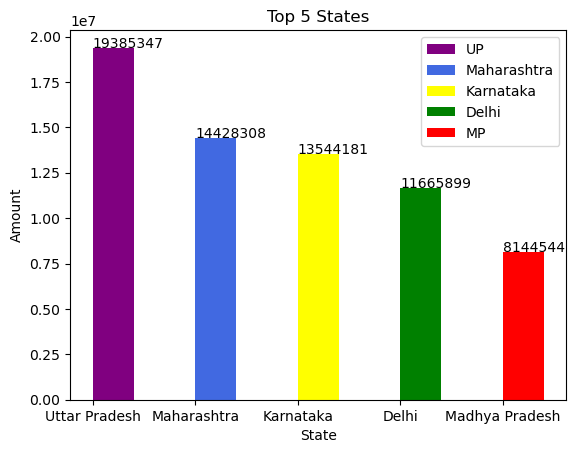

In [18]:
State_vs_Amount=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(5)
#print (State_vs_Amount)
State_details=State_vs_Amount['State'].to_list()
#print (State_details)
Amount_details=State_vs_Amount['Amount'].to_list()
#print (Amount_details)
colors=['purple','royalblue','yellow','green','red']
labels=['UP','Maharashtra','Karnataka','Delhi','MP']
plt.bar(State_details,Amount_details, width=0.4,align='edge',label=labels , color=colors)
plt.xlabel("State")
plt.ylabel("Amount")
plt.title("Top 5 States")
plt.legend(loc='upper right')
for i,v in enumerate(Amount_details):
    plt.text (i,v,str(v))
plt.show()

*Insight:-Uttar Pradesh, Maharashtra,Karnataka,Delhi,Madhya Pradesh are the Top 5 states contributed to sales*

# Top 5 States based on orders

             State  Orders
14   Uttar Pradesh    4809
10     Maharashtra    3799
7        Karnataka    3241
2            Delhi    2744
9   Madhya Pradesh    2259


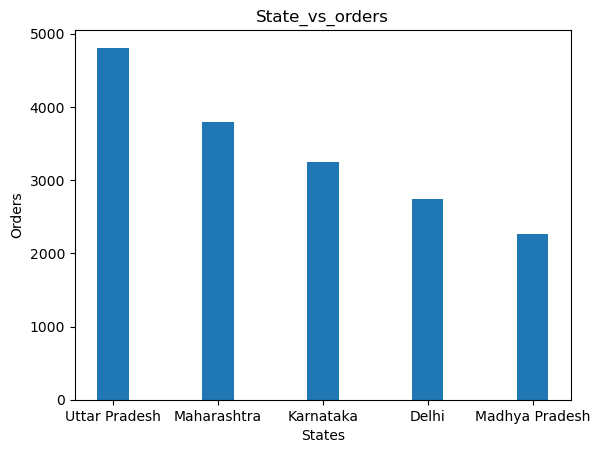

In [19]:
State_vs_Amount=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by=['Orders'],ascending=False).head(5)
print (State_vs_Amount)
State=State_vs_Amount['State'].to_list()
Orders=State_vs_Amount['Orders'].to_list()
plt.bar(State,Orders,width=0.3)
plt.xlabel("States")
plt.ylabel("Orders")
plt.title("State_vs_orders")
plt.show()

*Insights:-Uttar Pradesh, Maharashtra,Karnataka,Delhi,Madhya Pradesh are the Top 5 States who gave more orders*

# Sale Percentage Men_vs_Women

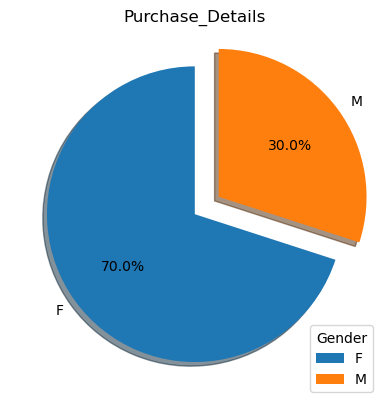

In [20]:
Gender_vs_Purchase=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)
Gender=Gender_vs_Purchase['Gender'].to_list()
#print (Gender)
Amount=Gender_vs_Purchase['Amount'].to_list()
#print (Amount)
myexplode=[0,0.2]
plt.pie(Amount,labels=Gender,startangle=90,explode=myexplode,shadow=True,autopct='%2.1f%%')
plt.legend(loc='lower right' ,title='Gender')
plt.title('Purchase_Details')
plt.show()

*Insight:- 70% Percent of the buyers are women in compared to men*

# Amount Spend:-Men_vs_Women

  Gender    Amount
1      M  31915251
0      F  74517157
['M', 'F']
[31915251, 74517157]


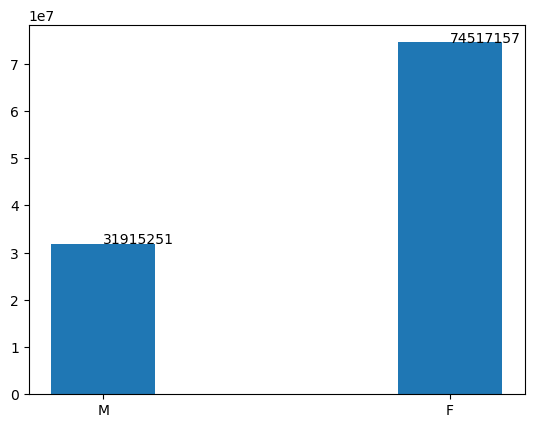

In [21]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=True)
print (sales_gen)
Gender=sales_gen['Gender'].to_list()
print (Gender)
Amount=sales_gen['Amount'].to_list()
print (Amount)
plt.bar(Gender,Amount,width=0.3)
for i,v in enumerate(Amount):
    plt.text (i,v,str(v))
plt.show()

*Insight:-From the above graph it is estimated that women spends more amount than men in shopping*

# Age Group Vs Sales

  Age Group    Amount
0      0-17   2699653
1     18-25  17235530
2     26-35  42621714
3     36-45  22195339
4     46-50   9296773
5     51-55   8278571
6       55+   4104828
['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
[2699653, 17235530, 42621714, 22195339, 9296773, 8278571, 4104828]


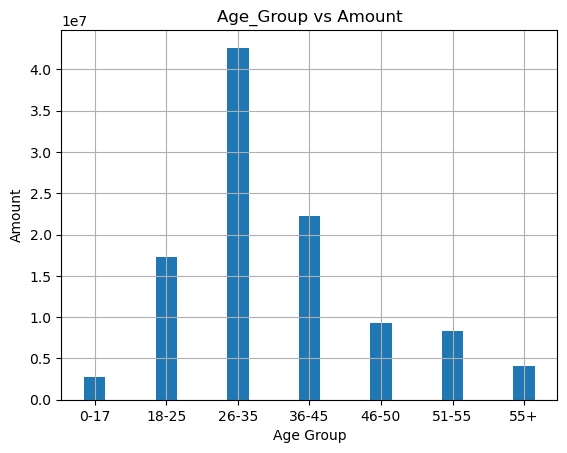

In [22]:
sales_agegroup=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Age Group',ascending=True)
print (sales_agegroup)
Age_Group=sales_agegroup['Age Group'].to_list()
print (Age_Group)
Amount=sales_agegroup['Amount'].to_list()
print (Amount)
plt.bar(Age_Group,Amount,width=0.3)
plt.xlabel('Age Group')
plt.ylabel('Amount')
plt.title('Age_Group vs Amount')
plt.grid(ls='-')
plt.show() 

*Insight:-The above graph shows that most of the buyers are of age group 26-35*

# Sales Vs Age Category Vs Gender

<class 'list'>
['Adult', 'Adult', 'Teenager', 'Teenager', 'SeniorCitizen', 'SeniorCitizen']
[0 1 2]


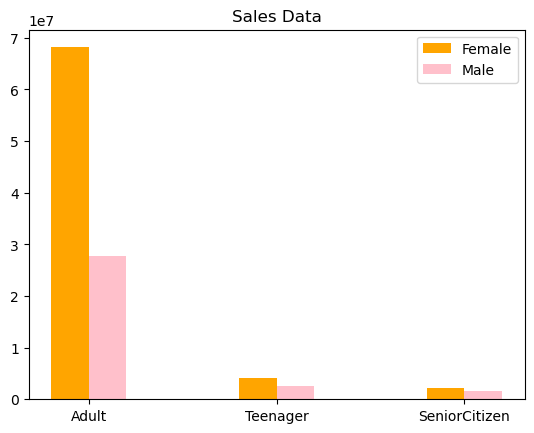

In [23]:
df.loc[df['Age']>59,"Age_Category"]='SeniorCitizen'
df.loc[(df['Age']>19) & (df['Age']<=59),"Age_Category"]='Adult'
df.loc[df['Age']<=19,"Age_Category"]='Teenager'
df[['Age','Age_Category']].to_string()
Sales=df.groupby(['Age_Category','Gender',],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
#print (Sales)
Gender_Category=Sales['Gender'].to_list()
print (type(Gender_Category))
Age_Categories=Sales['Age_Category'].to_list()
print (Age_Categories)
Amounts=Sales['Amount'].to_list()
#print (Amounts)

Female=Sales[Sales.where(Sales['Gender']=='F',other=0).all(1)]
#print (Female)
#print (type(Female))
Age1=Female['Age_Category'].to_list()
Females=Female['Gender'].to_list()
Amount1=Female['Amount'].to_list()
#print (Amount1)

Male=Sales[Sales.where(Sales['Gender']=='M',other=0).all(1)]
#print (Male)
#print (type(Male))
Age2=Male['Age_Category'].to_list()
Males=Male['Gender'].to_list()
Amount2=Male['Amount'].to_list()
#print (Amount2)

x=np.arange(len(Age1))
print (x)
w=0.2
plt.bar(x,Amount1,w,color='orange',label="Female")
plt.bar(x+0.2,Amount2,w,color='pink',label="Male")
plt.legend()
plt.xticks(x+w/2,Age1)
plt.title("Sales Data")
plt.show()

*Insight:-Women of Age_Category "Adult" spends more than "Teenager" or "SeniorCitizen"*

# Gender_vs_Sales

['Married', 'Unmarried']


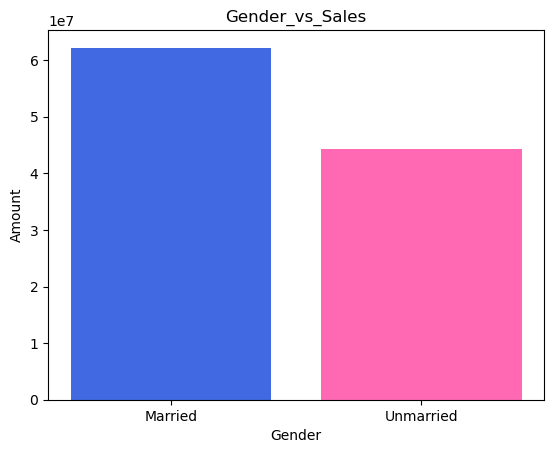

In [24]:
df.loc[df['Marital_Status']==0,'Marriage_Status']="Married"
df.loc[df['Marital_Status']==1,'Marriage_Status']="Unmarried"
marriage=df.groupby(['Marriage_Status'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
amount=marriage['Amount'].to_list()
marriage_status=marriage['Marriage_Status'].to_list()
print (marriage_status)
plt.bar(marriage_status,amount,color=["royalblue","hotpink"])
plt.xlabel("Gender")
plt.ylabel("Amount")
plt.title("Gender_vs_Sales")
plt.show()

*From the above graph Married people purchase more than Unmarried*

# Gender_vs_Marriage_Status_vs_Sales

  Marriage_Status Gender    Amount
0         Married      F  43842294
2       Unmarried      F  30674863
1         Married      M  18340563
3       Unmarried      M  13574688
['Married', 'Unmarried', 'Married', 'Unmarried']
  Marriage_Status Gender    Amount
0         Married      F  43842294
2       Unmarried      F  30674863
  Marriage_Status Gender    Amount
1         Married      M  18340563
3       Unmarried      M  13574688


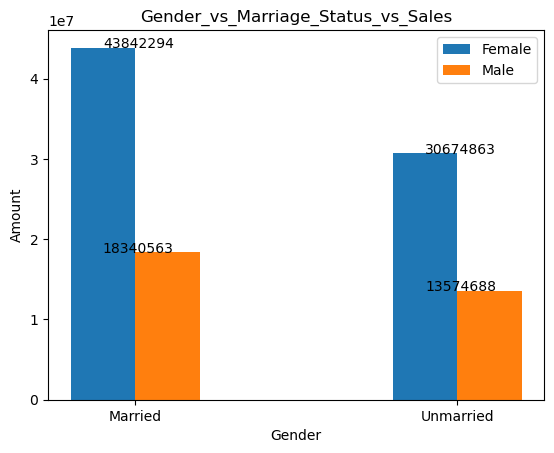

In [25]:
Sales_vs_marriage_status=df.groupby(['Marriage_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
print (Sales_vs_marriage_status)
marriage=Sales_vs_marriage_status['Marriage_Status'].to_list()
print (marriage)
amount=Sales_vs_marriage_status['Amount'].to_list()
Gender=Sales_vs_marriage_status['Gender'].to_list()
Female=Sales_vs_marriage_status[Sales_vs_marriage_status.where(Sales_vs_marriage_status['Gender']=='F',other=0).all(1)]
print (Female)
Age1=Female['Marriage_Status'].to_list()
Females=Female['Gender'].to_list()
Amount1=Female['Amount'].to_list()
Male=Sales_vs_marriage_status[Sales_vs_marriage_status.where(Sales_vs_marriage_status['Gender']=='M',other=0).all(1)]
print (Male)
Age2=Male['Marriage_Status'].to_list()
Males=Male['Gender'].to_list()
Amount2=Male['Amount'].to_list()
w=0.2
xpos=np.arange(len(Female))
plt.bar(xpos,Amount1,width=0.2,label="Female")
plt.bar(xpos+0.2,Amount2,width=0.2,label="Male")
plt.legend()
plt.xticks(xpos+w/2,Age1)
plt.xlabel("Gender")
plt.ylabel("Amount")
plt.title("Gender_vs_Marriage_Status_vs_Sales")
for i,v in enumerate(Amount1):
    plt.text (i,v,str(v))
for j,v in enumerate(Amount2):
    plt.text (j,v,str(v))
plt.show()

*Insight:-We see most of the buyers are Female having marital status as "Married"*

# Top 10 Product_Category

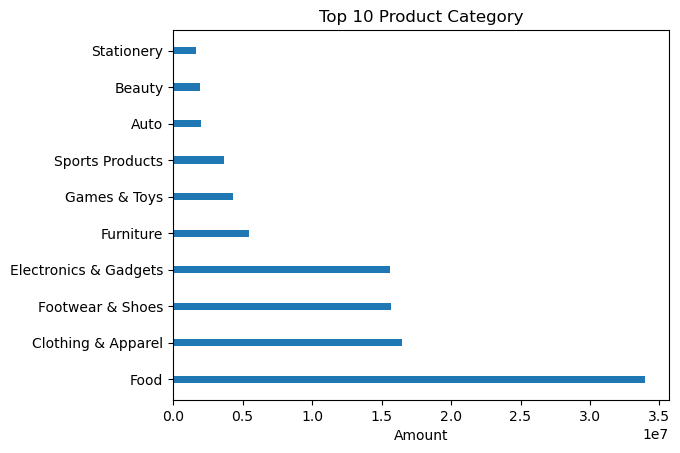

In [26]:
Product_Categories=df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10)
Product_Category=Product_Categories['Product_Category'].to_list()
#print (Product_Category)
Amount=Product_Categories['Amount'].to_list()
#print (Amount)
plt.barh(Product_Category,Amount,height=0.2)
plt.title("Top 10 Product Category")
plt.xlabel("Amount")
plt.show()

*From the above graph we can see that most of the orders are from Product Category Food,Clothing & Apparel, Footwear & Shoes,Electronics & Gadgets*

# Top 10 Product Id

     Product_ID  Amount
1680  P00265242  540136
645   P00110942  424833
1147  P00184942  401816
655   P00112142  341020
397   P00059442  338571
['P00265242', 'P00110942', 'P00184942', 'P00112142', 'P00059442']
[540136, 424833, 401816, 341020, 338571]


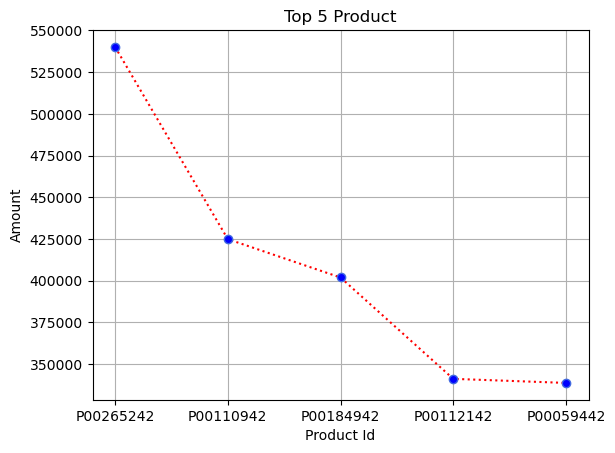

In [27]:
Product_Id=df.groupby('Product_ID',as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(5)
print (Product_Id)
Product=Product_Id['Product_ID'].to_list()
print (Product)
Sales=Product_Id['Amount'].to_list()
print (Sales)
plt.plot(Product,Sales,'o:r',mec='royalblue',mfc='blue')
plt.grid()
plt.xlabel("Product Id")
plt.ylabel("Amount")
plt.title("Top 5 Product")
plt.show()

*From the above graph we can see that most of the orders are on product id- P00265242,P00110942,P00184942*

# Occupation

    Occupation    Amount
10   IT Sector  14850274
8   Healthcare  13034586
2     Aviation  12599994
3      Banking  10812157
7         Govt   8517212


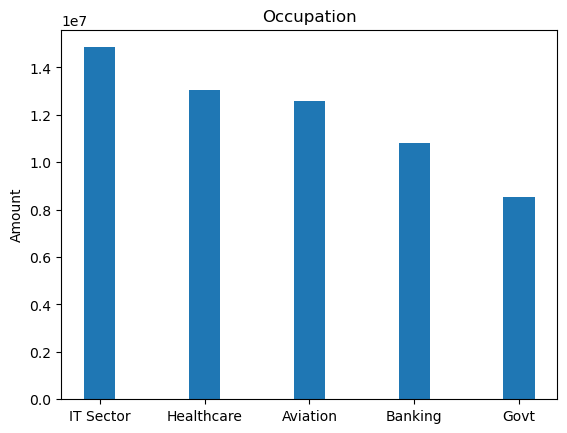

In [28]:
Occupations=df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(5)
print (Occupations)
Occupation=Occupations['Occupation'].to_list()
Amount=Occupations['Amount'].to_list()
plt.bar(Occupation,Amount,width=0.3)
plt.ylabel("Amount")
plt.title("Occupation")
plt.show()

*We can see that the most of the buyers are working in IT Sector, Healthcare,Aviation*

* Conclusion:-
Married Woman of age group 26-35 living in Uttar Pradesh,Maharashtra,Karnataka & working in IT Sector,Healthcare,Aviation are more likely to buy products from Food,Clothing & Appael,Footwear & Shoes *